# Do books with more reviews get better ratings?

## Creating a cluster of books' attributes such as number of pages, number of reviews and ratings to find out the impactof number of pages and number of reviews on ratings.

In [1]:
## Loading the dataset
import types
import pandas as pd
from botocore.client import Config
import ibm_boto3

def __iter__(self): return 0

# @hidden_cell
# The following code accesses a file in your IBM Cloud Object Storage. It includes your credentials.
# You might want to remove those credentials before you share your notebook.
client_e62b6c1bb76c4710b1d1cc5aeab9a929 = ibm_boto3.client(service_name='s3',
    ibm_api_key_id='9ZymKSD_6E0Aw3YRO1fn1RBF95BmxW_zKvIslTE4CC4g',
    ibm_auth_endpoint="https://iam.ng.bluemix.net/oidc/token",
    config=Config(signature_version='oauth'),
    endpoint_url='https://s3-api.us-geo.objectstorage.service.networklayer.com')

body = client_e62b6c1bb76c4710b1d1cc5aeab9a929.get_object(Bucket='databel-donotdelete-pr-d4qsbyzwywn9lq',Key='books - books.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

df_data_1 = pd.read_csv(body)
df_data_1.head()


,bookID,title,authors,average_rating,isbn,isbn13,language_code,# num_pages,ratings_count,text_reviews_count,Unnamed: 10
0,1,Harry Potter and the Half-Blood Prince (Harry ...,J.K. Rowling-Mary GrandPré,4.56,439785960,9780439785969,eng,652,1944099,26249,NaN
1,2,Harry Potter and the Order of the Phoenix (Har...,J.K. Rowling-Mary GrandPré,4.49,439358078,9780439358071,eng,870,1996446,27613,NaN
2,3,Harry Potter and the Sorcerer's Stone (Harry P...,J.K. Rowling-Mary GrandPré,4.47,439554934,9780439554930,eng,320,5629932,70390,NaN
3,4,Harry Potter and the Chamber of Secrets (Harry...,J.K. Rowling,4.41,439554896,9780439554893,eng,352,6267,272,NaN
4,5,Harry Potter and the Prisoner of Azkaban (Harr...,J.K. Rowling-Mary GrandPré,4.55,043965548X,9780439655484,eng,435,2149872,33964,NaN


In [2]:
## The important columns were selected
df_books = df_data_1[['title','average_rating','# num_pages', 'ratings_count']]

In [3]:
## The first 5 rows were viewed
df_books.head()

,title,average_rating,# num_pages,ratings_count
0,Harry Potter and the Half-Blood Prince (Harry ...,4.56,652,1944099
1,Harry Potter and the Order of the Phoenix (Har...,4.49,870,1996446
2,Harry Potter and the Sorcerer's Stone (Harry P...,4.47,320,5629932
3,Harry Potter and the Chamber of Secrets (Harry...,4.41,352,6267
4,Harry Potter and the Prisoner of Azkaban (Harr...,4.55,435,2149872


In [4]:
df_books.shape

(13719, 4)

In [5]:
## The columns were converted to numeric and their correlation coefficient was calculated
df_books[['average_rating', '# num_pages', 'ratings_count']] = df_books[['average_rating', '# num_pages', 'ratings_count']].convert_objects(convert_numeric = True)
df_books.corr()

/opt/conda/envs/Python36/lib/python3.6/site-packages/ipykernel/__main__.py:2: FutureWarning: convert_objects is deprecated.  To re-infer data dtypes for object columns, use DataFrame.infer_objects()
For all other conversions use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  from ipykernel import kernelapp as app
/opt/conda/envs/Python36/lib/python3.6/site-packages/pandas/core/frame.py:3391: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[k1] = value[k2]


,average_rating,# num_pages,ratings_count
average_rating,1.000000,0.167388,0.041234
# num_pages,0.167388,1.000000,0.028413
ratings_count,0.041234,0.028413,1.000000


In [6]:
## The dataset was truncated to include relevant information
df_books = df_books[df_books['# num_pages'] > 100]  
df_books = df_books[df_books['ratings_count'] > 1000]

In [7]:
df_books.shape

(5784, 4)

In [8]:
## The dataset was built to present the books in order of descending ratings
df_books.sort_values(by = "average_rating", ascending = False)
df_books.reset_index(inplace = True)
df_books.drop("index", axis = 1, inplace = True)
df_books.head(10)

,title,average_rating,# num_pages,ratings_count
0,Harry Potter and the Half-Blood Prince (Harry ...,4.56,652.0,1944099
1,Harry Potter and the Order of the Phoenix (Har...,4.49,870.0,1996446
2,Harry Potter and the Sorcerer's Stone (Harry P...,4.47,320.0,5629932
3,Harry Potter and the Chamber of Secrets (Harry...,4.41,352.0,6267
4,Harry Potter and the Prisoner of Azkaban (Harr...,4.55,435.0,2149872
5,Harry Potter Boxed Set Books 1-5 (Harry Potte...,4.78,2690.0,38872
6,Harry Potter Collection (Harry Potter #1-6),4.73,3342.0,27410
7,The Ultimate Hitchhiker's Guide: Five Complete...,4.38,815.0,3602
8,The Ultimate Hitchhiker's Guide to the Galaxy,4.38,815.0,240189
9,The Hitchhiker's Guide to the Galaxy (Hitchhik...,4.22,215.0,4416


In [9]:
import random 
import numpy as np 
import matplotlib.pyplot as plt 
from sklearn.cluster import KMeans 
from sklearn.datasets.samples_generator import make_blobs 
%matplotlib inline

In [10]:
from sklearn.preprocessing import StandardScaler
X = df_books[['average_rating', '# num_pages', 'ratings_count']]
X = np.nan_to_num(X)
Clus_dataSet = StandardScaler().fit_transform(X)

In [11]:
## creating a k-means model
k_means = KMeans(init = "k-means++", n_clusters = 3, n_init = 10)
k_means.fit(X)
labels = k_means.labels_
print(labels)

[1 1 1 ... 0 0 0]


In [12]:
df_books["group"] = labels
df_books.head(20)

,title,average_rating,# num_pages,ratings_count,group
0,Harry Potter and the Half-Blood Prince (Harry ...,4.56,652.0,1944099,1
1,Harry Potter and the Order of the Phoenix (Har...,4.49,870.0,1996446,1
2,Harry Potter and the Sorcerer's Stone (Harry P...,4.47,320.0,5629932,1
3,Harry Potter and the Chamber of Secrets (Harry...,4.41,352.0,6267,0
4,Harry Potter and the Prisoner of Azkaban (Harr...,4.55,435.0,2149872,1
5,Harry Potter Boxed Set Books 1-5 (Harry Potte...,4.78,2690.0,38872,0
6,Harry Potter Collection (Harry Potter #1-6),4.73,3342.0,27410,0
7,The Ultimate Hitchhiker's Guide: Five Complete...,4.38,815.0,3602,0
8,The Ultimate Hitchhiker's Guide to the Galaxy,4.38,815.0,240189,0
9,The Hitchhiker's Guide to the Galaxy (Hitchhik...,4.22,215.0,4416,0


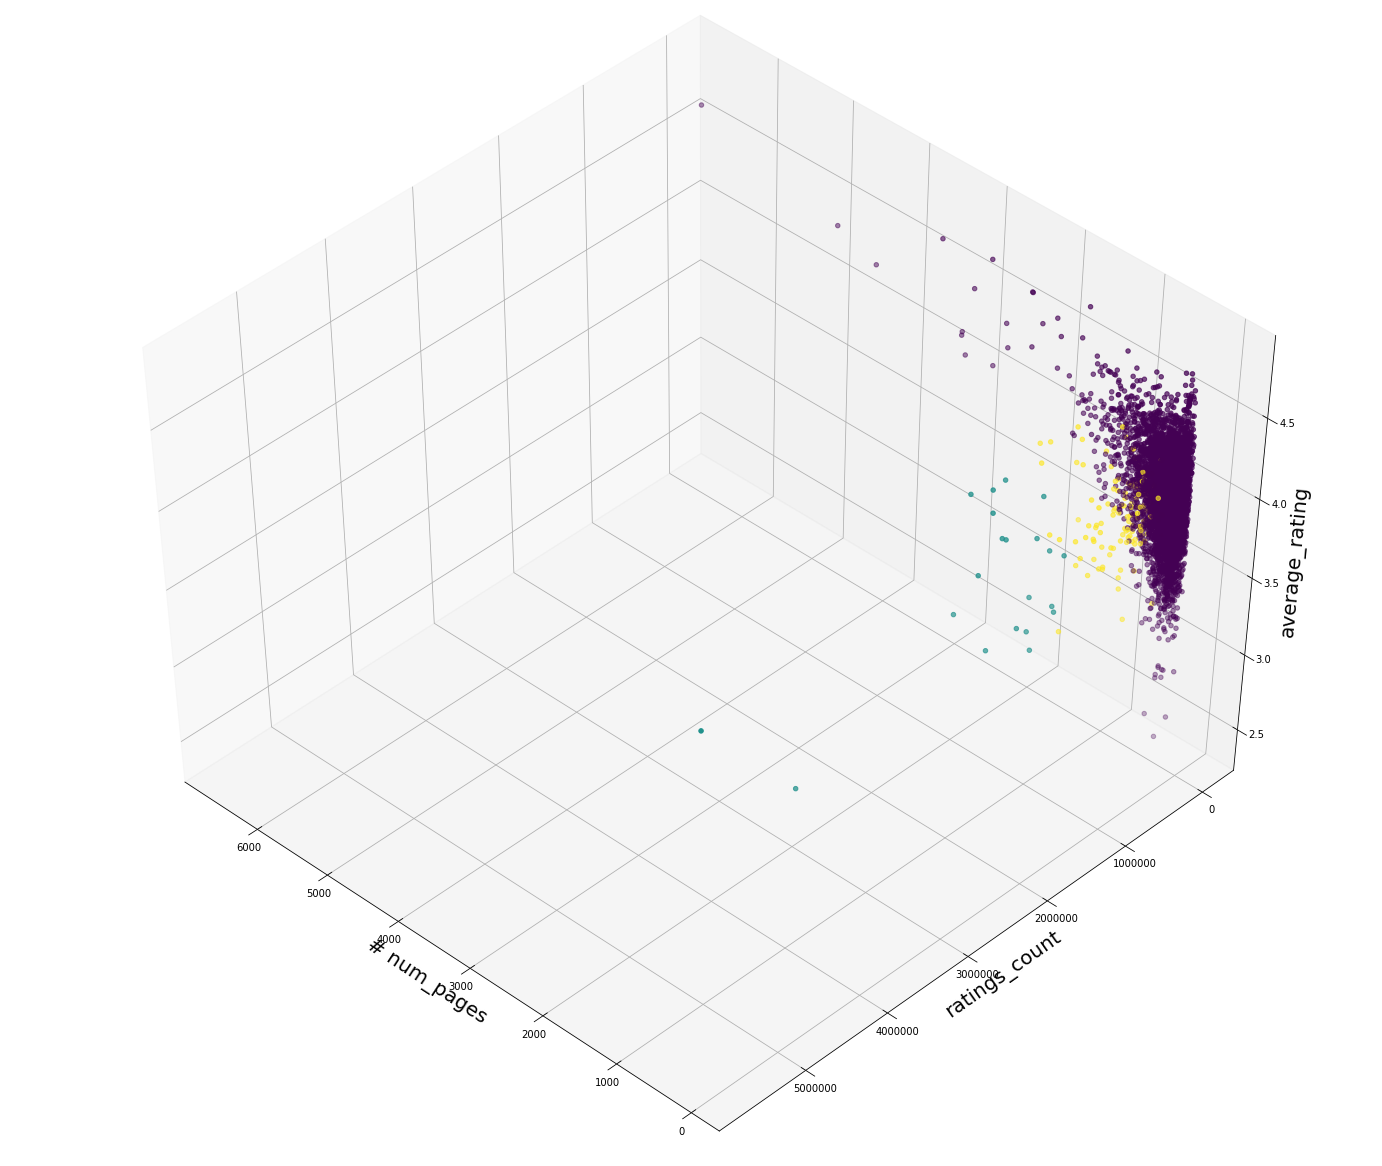

In [19]:
from mpl_toolkits.mplot3d import Axes3D 
fig = plt.figure(1, figsize=(20,16))
plt.clf()
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)

plt.cla()
ax.set_xlabel('# num_pages', fontsize = 20)
ax.set_ylabel('ratings_count', fontsize = 20)
ax.set_zlabel('average_rating', fontsize = 20)
ax.scatter(X[:, 1], X[:, 2], X[:, 0], c= labels.astype(np.float))

In [14]:
df_books1 = df_books.groupby('group').mean()

In [15]:
df_books1['color'] = ['purple', 'green', 'yellow']

In [16]:
df_books1

,average_rating,# num_pages,ratings_count,color
group,,,,
0,3.954480,379.577203,2.129352e+04,purple
1,4.116667,414.857143,2.157575e+06,green
2,4.026967,393.213115,5.730623e+05,yellow
